# EDA

In [141]:
import pandas as pd
import ydata_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex as re
%matplotlib inline

In [142]:
#read data and check its head to get first 5 values of the dataset

data_path = "../data/smartwatches.csv"
df = pd.read_csv(data_path)

df.head()


Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [143]:
#this is considered a small dataset
df.shape

(450, 16)

In [144]:
df.drop_duplicates(inplace=True) #drop duplicates in the original dataframe
df.shape #check the shape of the dataframe after dropping duplicates 

#Since the shape of the dataframe did not change, it means there were no duplicates in the dataframe

(450, 16)

<span style="color:red">Remove Unnamed 32 column.</span>

In [145]:
#separate into test and train data
train_df = df.sample(frac=0.8, random_state=42) #random state is the seed used by the random number generator for reproducibility
train_df = train_df.reset_index()
test_df = df.drop(train_df.index) #drop the indexes that are in the train_df
test_df = test_df.reset_index()

In [146]:
print(train_df.shape, test_df.shape) 

(360, 17) (90, 17)


In [147]:
train_df.tail() 

index  Unnamed: 0      Brand  Current Price  Original Price  \
355    216         216     fitbit        11699.0         14999.0   
356    279         279     garmin        39490.0         44990.0   
357    390         390  zebronics         2199.0          4999.0   
358    337         337    gizmore         1199.0          4499.0   
359    236         236     fitbit        20499.0             NaN   

     Discount Percentage  Rating  Number OF Ratings  \
355            22.001467     4.3             3999.0   
356            12.224939     4.7              109.0   
357            56.011202     3.9              272.0   
358            73.349633     4.7                NaN   
359                  NaN     4.7                NaN   

                                            Model Name Dial Shape Strap Color  \
355                                            Versa 2     Square       Black   
356  Instinct 2, Rugged Outdoor Watch with GPS, Bui...     Circle        Grey   
357                                         Zeb-Fit Me     Square       Green   
358  GizFit CLOUD 1.85 IPS Large Display | AI Voice...     Square        Blue   
359  Fitbit Versa 4 Fitness Watch (Waterfall Blue /...     Curved        Blue   

                  Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
355                      Silicon         Yes                  3.5       Yes   
356                      Silicon          No                 17.5       Yes   
357  Thermo Plastic Polyurethene         Yes                 22.0       Yes   
358                      Silicon         Yes                 22.0       Yes   
359                       Rubber         Yes                 22.0       Yes   

    Display Size     Weight  
355   1.3 inches  20 - 35 g  
356   0.9 inches        NaN  
357   3.3 inches  20 - 35 g  
358   1.8 inches  20 - 35 g  
359   0.2 inches        NaN

In [148]:
#find out what data types are here
#object is basically a string
train_df.dtypes 

index                    int64
Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [149]:
train_df.isna().sum() #check for missing values

index                    0
Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

In [150]:
train_df.isna().sum() #check for missing values

index                    0
Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

<span style="color:red">Remove the null data.</span>

In [151]:
train_df.info() #359 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Unnamed: 0           360 non-null    int64  
 2   Brand                360 non-null    object 
 3   Current Price        354 non-null    float64
 4   Original Price       304 non-null    float64
 5   Discount Percentage  304 non-null    float64
 6   Rating               356 non-null    float64
 7   Number OF Ratings    315 non-null    float64
 8   Model Name           330 non-null    object 
 9   Dial Shape           260 non-null    object 
 10  Strap Color          260 non-null    object 
 11  Strap Material       304 non-null    object 
 12  Touchscreen          329 non-null    object 
 13  Battery Life (Days)  330 non-null    float64
 14  Bluetooth            355 non-null    object 
 15  Display Size         333 non-null    obj

In [152]:
#expression for item in iterable if condition
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object'] #get all numerical data
categorical_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object'] #get all categorical data


print(numerical_data)
print(categorical_data)

['index', 'Unnamed: 0', 'Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings', 'Battery Life (Days)']
['Brand', 'Model Name', 'Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen', 'Bluetooth', 'Display Size', 'Weight']


In [153]:
train_df[numerical_data].describe() #get the summary statistics of the numerical data
# note the -79 precent discount, this is an error in the data or it means the price has increased by 79 percent.

index  Unnamed: 0  Current Price  Original Price  \
count  360.000000  360.000000     354.000000      304.000000   
mean   222.702778  222.702778   12514.378531    14415.835526   
std    130.632905  130.632905   16914.978666    15613.457236   
min      0.000000    0.000000    1199.000000     1669.000000   
25%    111.750000  111.750000    2126.000000     5999.000000   
50%    222.500000  222.500000    3999.000000     7994.500000   
75%    336.250000  336.250000   17367.250000    17996.000000   
max    448.000000  448.000000   98990.000000    96390.000000   

       Discount Percentage      Rating  Number OF Ratings  Battery Life (Days)  
count           304.000000  356.000000         315.000000           330.000000  
mean             47.955347    4.027528       10671.815873            14.181970  
std              24.696899    0.556828       27575.956948             7.661878  
min             -79.688436    1.000000           1.000000             0.750000  
25%              33.177427    3.900000          55.000000             8.000000  
50%              53.068408    4.100000         830.000000            17.500000  
75%              66.677780    4.300000        7576.500000            22.000000  
max              91.004550    5.000000      275607.000000            22.000000

In [154]:
train_df[numerical_data].corr() #get the correlation between the numerical data

index  Unnamed: 0  Current Price  Original Price  \
index                1.000000    1.000000      -0.100146       -0.084262   
Unnamed: 0           1.000000    1.000000      -0.100146       -0.084262   
Current Price       -0.100146   -0.100146       1.000000        0.971497   
Original Price      -0.084262   -0.084262       0.971497        1.000000   
Discount Percentage -0.123792   -0.123792      -0.602668       -0.479494   
Rating              -0.247504   -0.247504       0.397179        0.325818   
Number OF Ratings   -0.187509   -0.187509      -0.195773       -0.180650   
Battery Life (Days)  0.371223    0.371223       0.030352       -0.132527   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.123792 -0.247504          -0.187509   
Unnamed: 0                     -0.123792 -0.247504          -0.187509   
Current Price                  -0.602668  0.397179          -0.195773   
Original Price                 -0.479494  0.325818          -0.180650   
Discount Percentage             1.000000 -0.191073           0.235221   
Rating                         -0.191073  1.000000           0.085250   
Number OF Ratings               0.235221  0.085250           1.000000   
Battery Life (Days)            -0.011792 -0.102289           0.009617   

                     Battery Life (Days)  
index                           0.371223  
Unnamed: 0                      0.371223  
Current Price                   0.030352  
Original Price                 -0.132527  
Discount Percentage            -0.011792  
Rating                         -0.102289  
Number OF Ratings               0.009617  
Battery Life (Days)             1.000000

In [155]:
train_df[numerical_data].skew() #get the skewness of the numerical data


index                  0.012368
Unnamed: 0             0.012368
Current Price          2.301689
Original Price         2.734265
Discount Percentage   -0.983632
Rating                -1.589043
Number OF Ratings      5.467630
Battery Life (Days)   -0.190298
dtype: float64

In [156]:
#We can use pandas profiling to get a detailed report of the data instead of doing all the above steps
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Complex Visualizations

In [157]:
#Lets use Univariate Plots 

#First lets remove the unwanted columns

numerical_data.remove('index') #remove the index column
numerical_data.remove('Unnamed: 0') #remove the Unnamed: 0 column
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

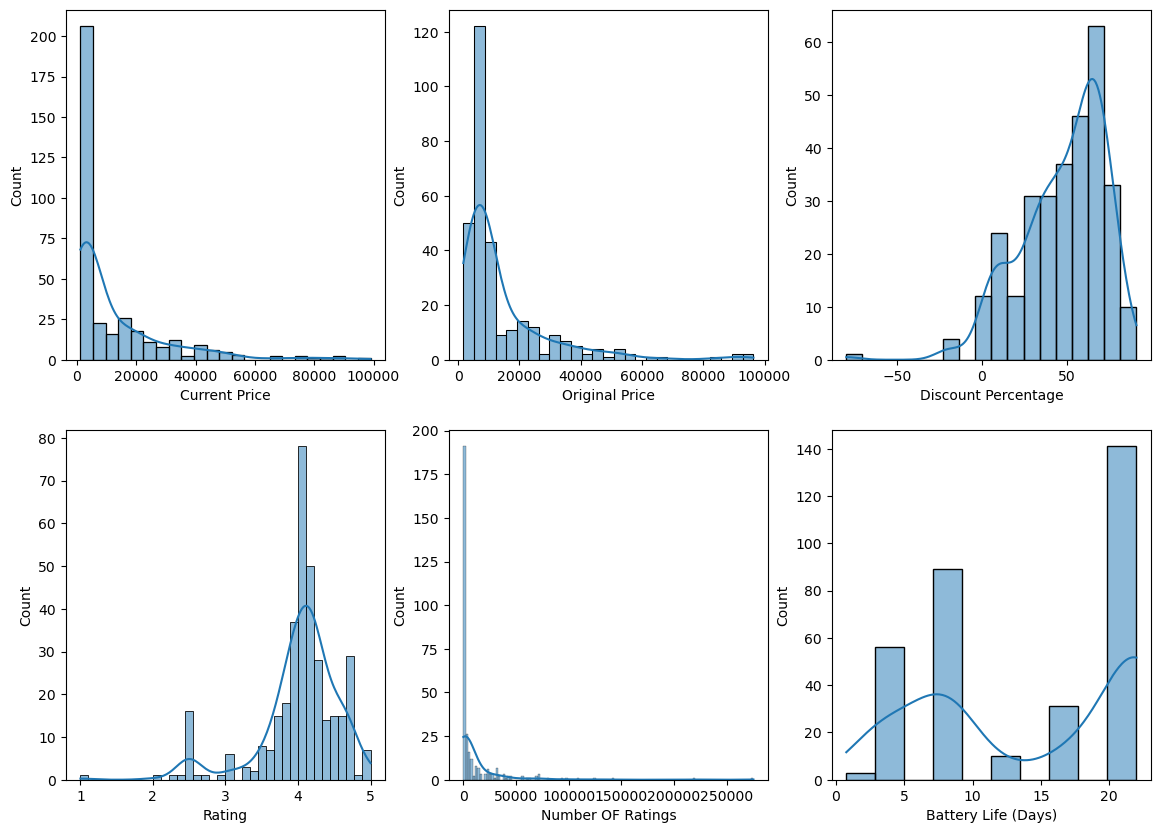

In [158]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data): #graph each column in the numerical data with the kde 
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    sns.histplot(train_df[column], ax=ax, kde=True)

plt.show()

# a lot of the data is skewed so we will need to normalize it bc linear regression assumes normality

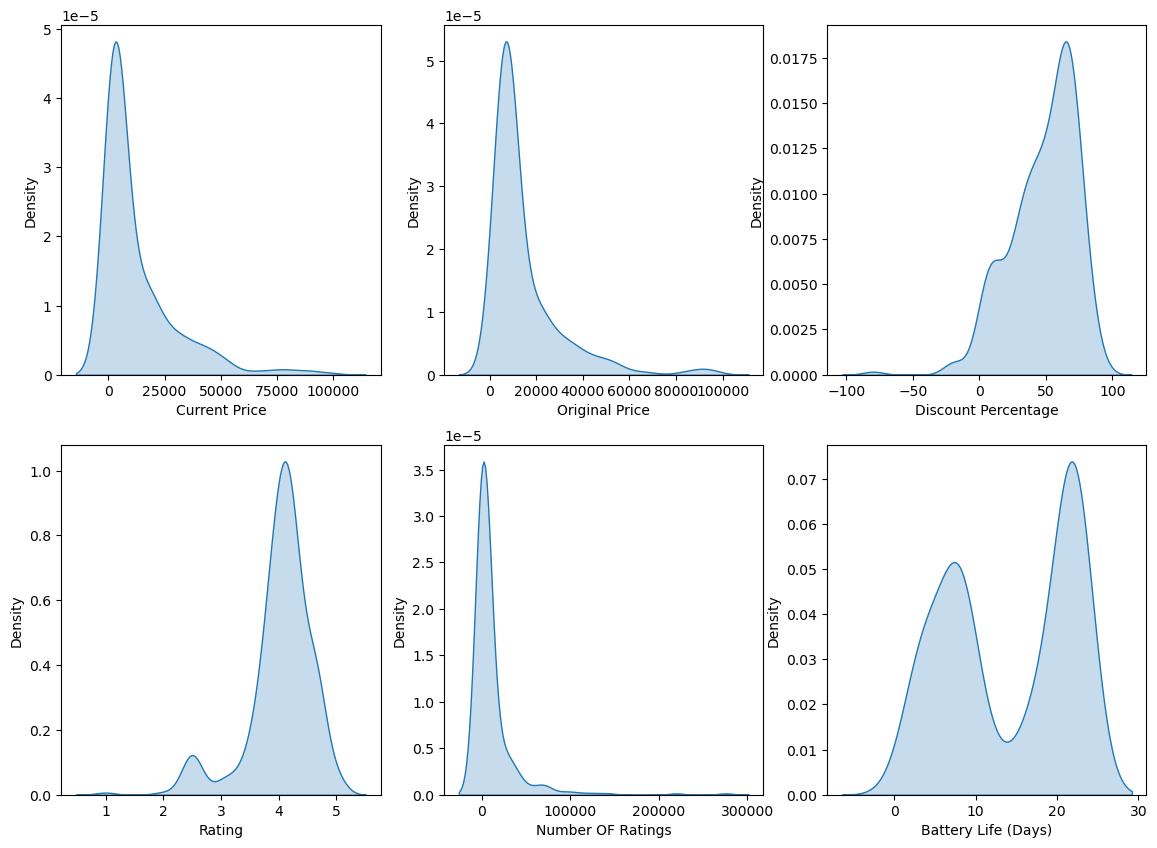

In [159]:
#KDE 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data): # KDE plots offer a smoothed, continuous estimate of the data's probability density.
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    sns.kdeplot(train_df[column], ax=ax, fill=True)

plt.show()


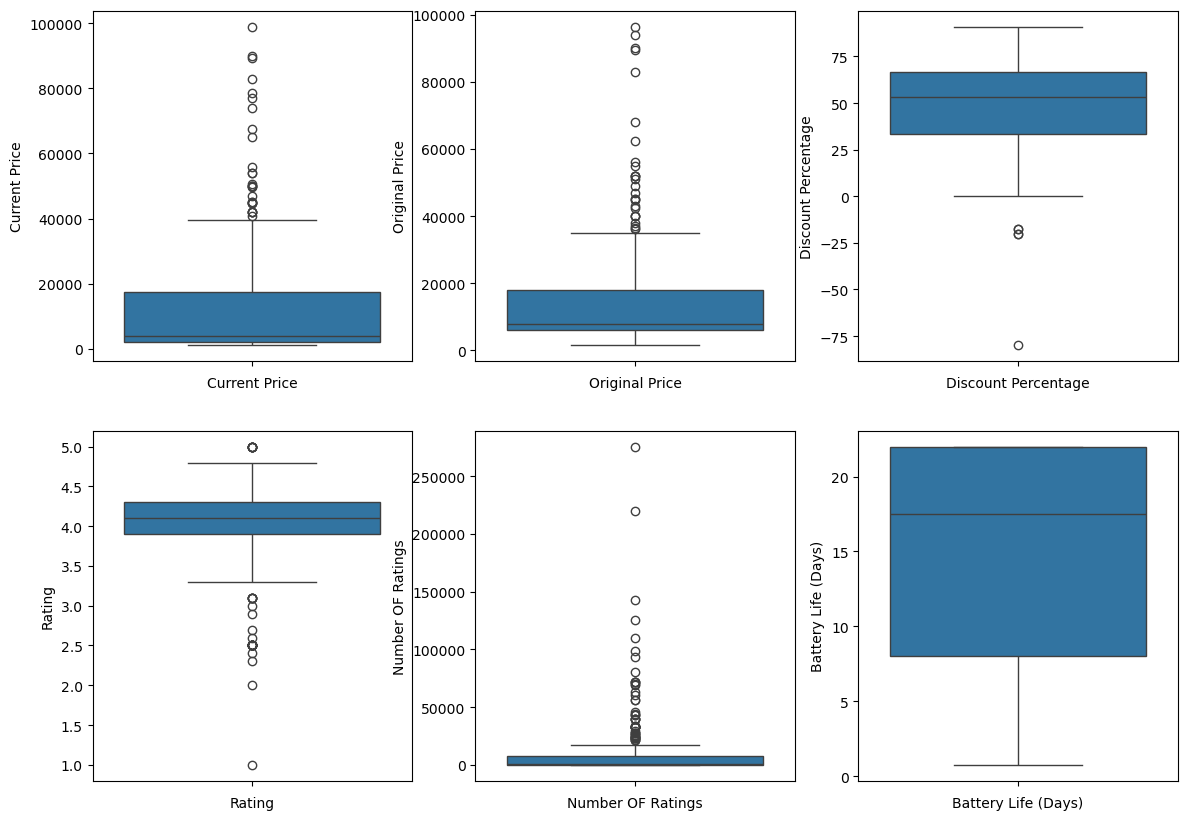

In [160]:
#Boxplot

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data): # Box plots are used to show the distribution of a dataset in terms of its median, quartiles, and outliers.
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    sns.boxplot(train_df[column], ax=ax, fill=True)
    ax.set_xlabel(column)

plt.tight_layout
plt.show()

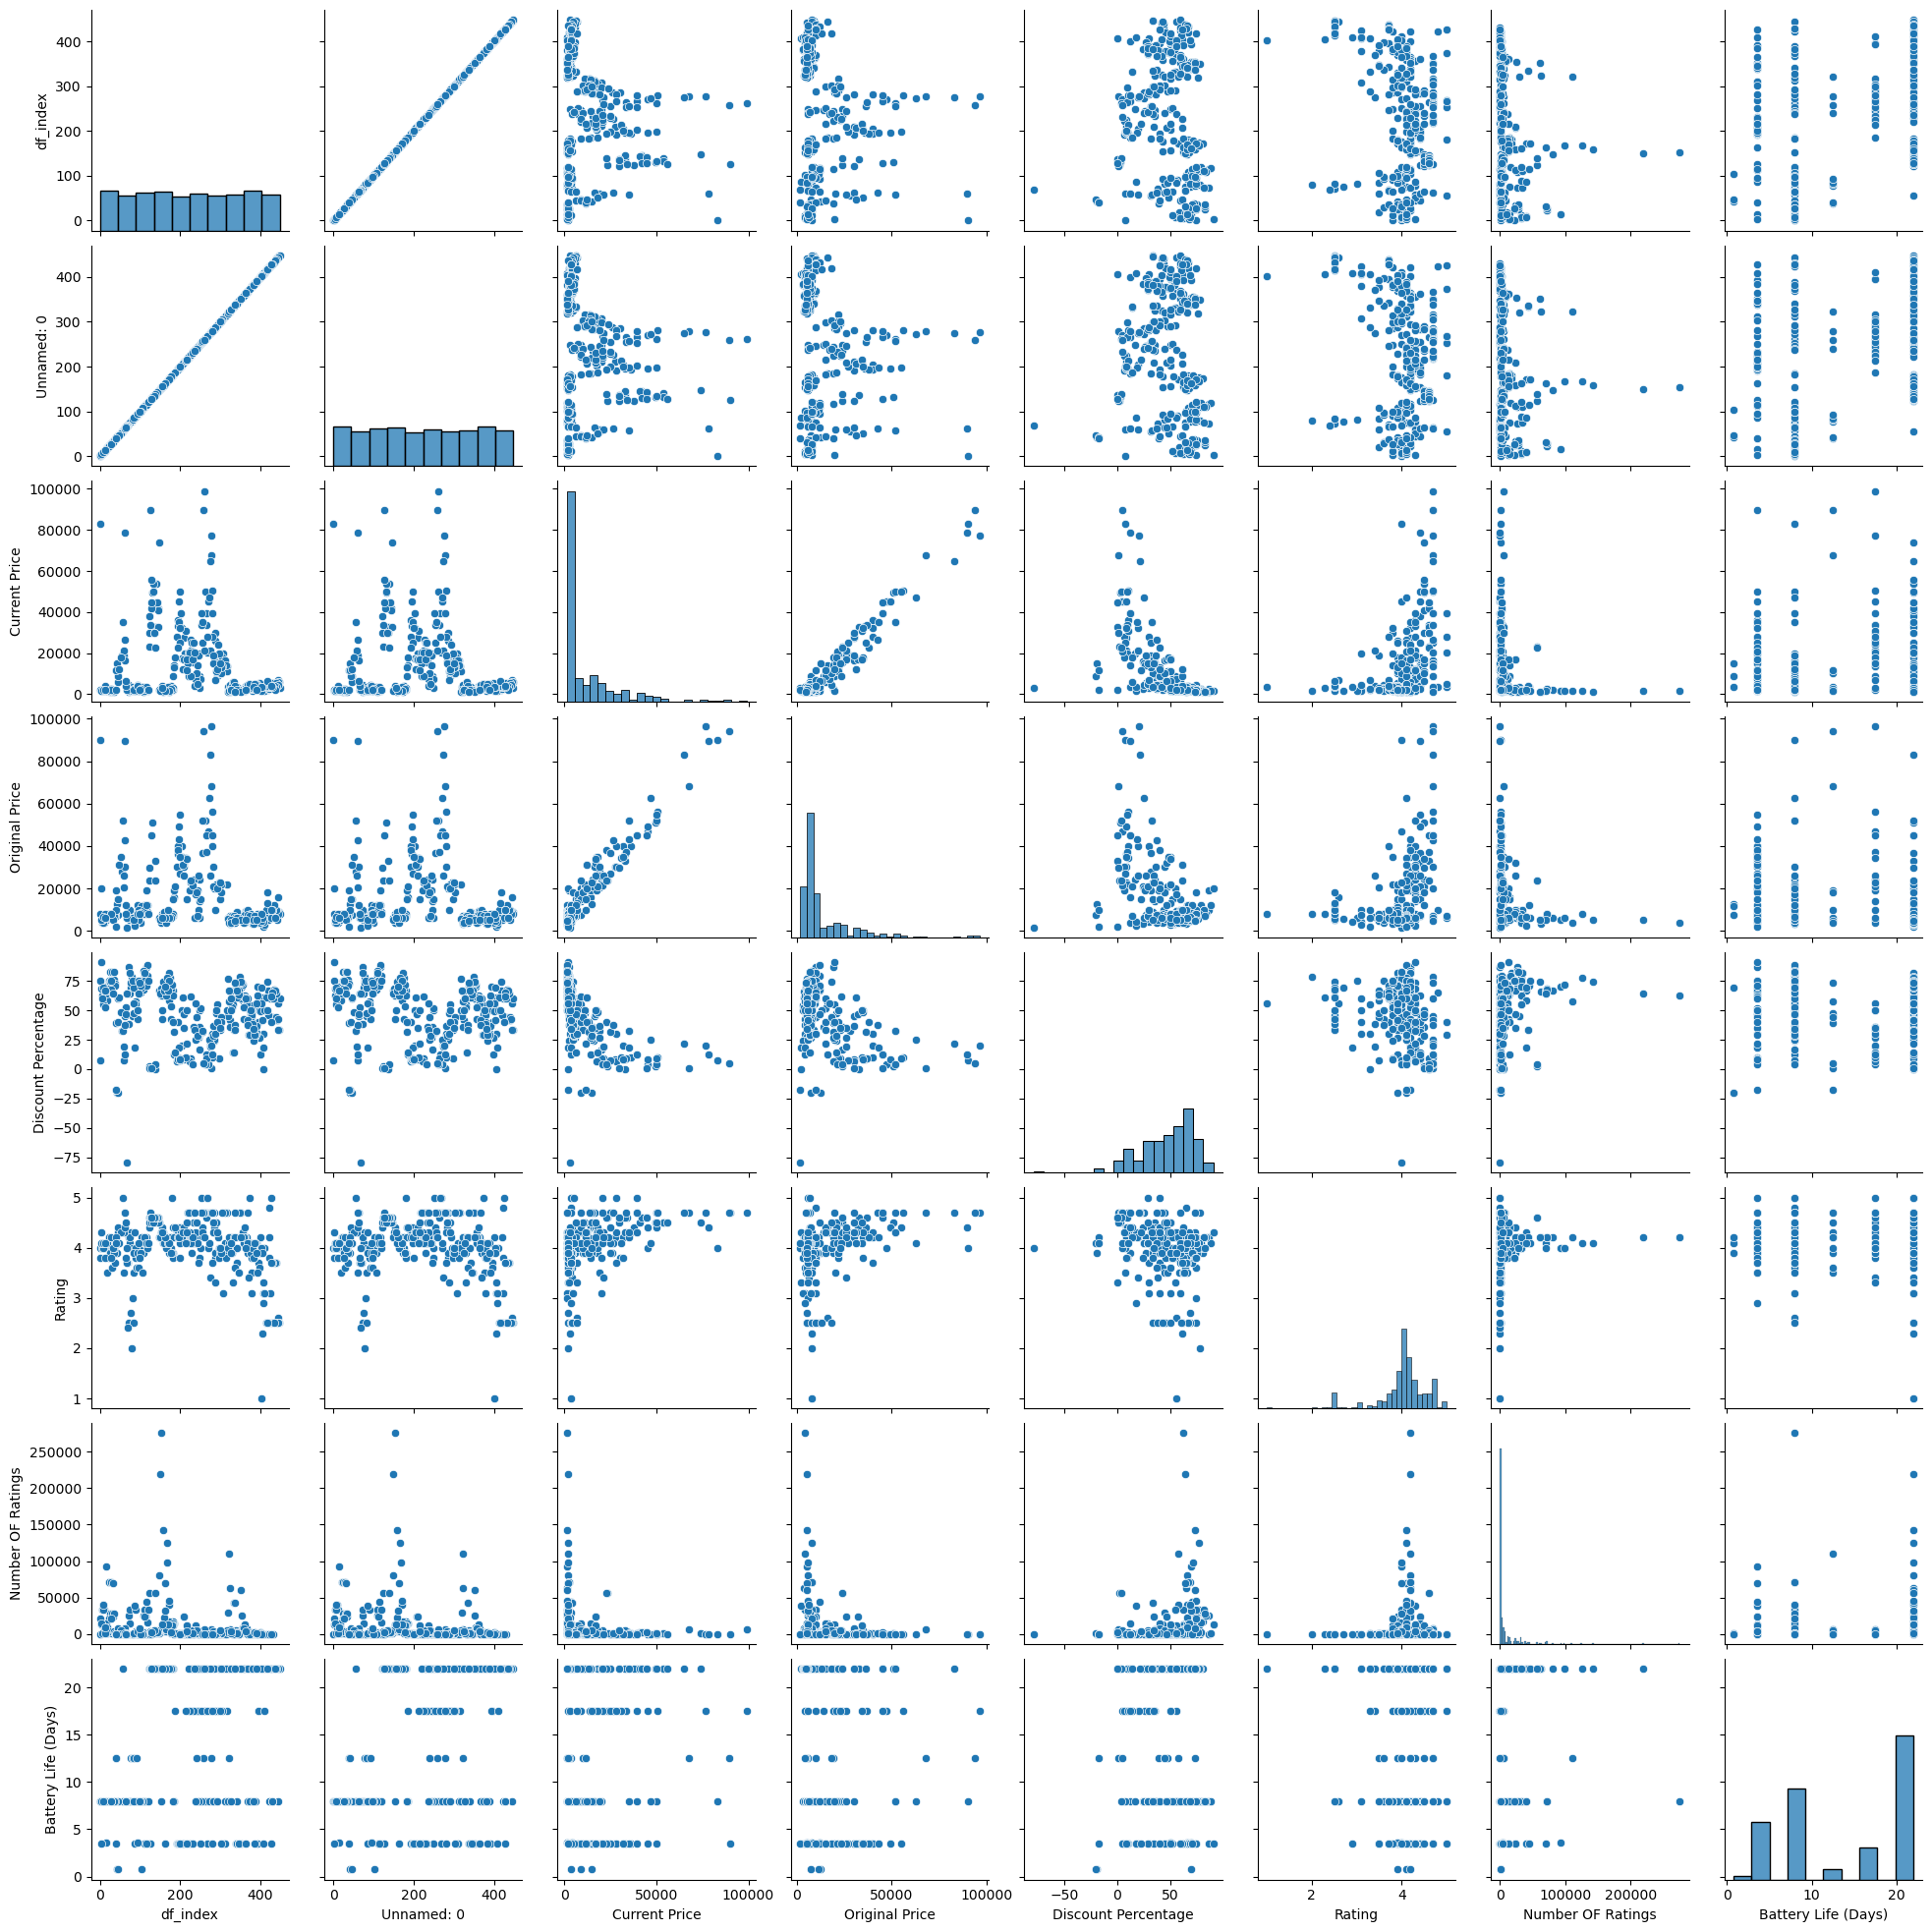

In [161]:
# Pairplot
sns.pairplot(train_df) #pairplot is used to plot pairwise relationships in a dataset.

<Axes: >

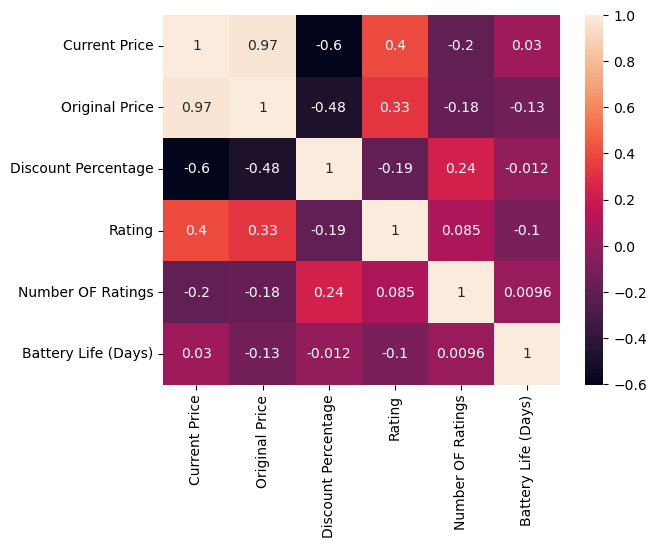

In [162]:
sns.heatmap(train_df[numerical_data].corr(), annot=True) #heatmap is used to plot rectangular data as a color-encoded matrix.

# Feature Engineering - Numerical Features



In [263]:
train_df = df.copy()
train_df.head()


Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [264]:
#Remove unnamed 32 and index

train_df.drop(['Unnamed: 0'], axis=1, inplace=True) #inplace just removes it from this dataframe

In [265]:
#we need to replace those na's
print(train_df['Display Size'].isna().sum())


train_df['Display Size'].value_counts().count() #shows the different values in this column

30


40

In [266]:
train_df['Display Size'].fillna('0.0 Inches', inplace=True) #replace all na's with 0 

/var/folders/_r/nlxx6nzj7q76fnrcjnbc576w0000gn/T/ipykernel_30579/977488349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 Inches', inplace=True) #replace all na's with 0


In [267]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0])) # x is every row in the data. We split the value and converting the first value to a float

train_df['Display Size'].head()


0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [268]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True) #return 0.0 back to na

train_df['Display Size'].isna().sum()

/var/folders/_r/nlxx6nzj7q76fnrcjnbc576w0000gn/T/ipykernel_30579/1591937121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0, np.nan, inplace=True) #return 0.0 back to na


31

In [269]:
# Now lets do weigh
print(train_df['Weight'].value_counts())

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64


In [270]:

# #since there is a range we take the mean
cal = sum([int(x) for x in re.findall('\d+', '20 - 35 g')]) / 2 #we get 20 and 35 as an array and divide by 2 to get the mean
train_df['Weight'].replace('20 - 35 g', cal, inplace=True)

#repeat it for the rest of the values

cal = sum([int(x) for x in re.findall('\d+', '35 - 50 g')]) / 2
train_df['Weight'].replace('35 - 50 g', cal, inplace=True)

cal = sum([int(x) for x in re.findall('\d+', '50 - 75 g')]) / 2
train_df['Weight'].replace('50 - 75 g', cal, inplace=True)

train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)

train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)

train_df['Weight'].value_counts()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_r/nlxx6nzj7q76fnrcjnbc576w0000gn/T/ipykernel_30579/3903491902.py:2: SyntaxWarning: invalid escape sequence '\d'
  cal = sum([int(x) for x in re.findall('\d+', '20 - 35 g')]) / 2 #we get 20 and 35 as an array and divide by 2 to get the mean
/var/folders/_r/nlxx6nzj7q76fnrcjnbc576w0000gn/T/ipykernel_30579/3903491902.py:7: SyntaxWarning: invalid escape sequence '\d'
  cal = sum([int(x) for x in re.findall('\d+', '35 - 50 g')]) / 2
/var/folders/_r/nlxx6nzj7q76fnrcjnbc576w0000gn/T

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [271]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [272]:
#covert percentage discount to float

train_df["Discount Price"] =  train_df["Original Price"] * (-train_df["Discount Percentage"] / 100) #get the discount amount
train_df.drop(["Discount Percentage"], axis=1, inplace=True) #drop the discount percentage column


In [273]:
#separate numerical and categorical data
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']
categorical_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

numerical_data

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [274]:
train_df[numerical_data].head()

Current Price  Original Price  Rating  Number OF Ratings  \
0        82990.0         89900.0     4.0               65.0   
1         3799.0         16999.0     4.3            20788.0   
2         1999.0          7990.0     3.8            21724.0   
3         1799.0         19999.0     4.3            13244.0   
4         1599.0          4999.0     4.1            13901.0   

   Battery Life (Days)  Display Size  Weight  Discount Price  
0                  8.0           NaN    42.5    -6910.000000  
1                  3.5           1.8    62.5   -13200.000001  
2                  8.0           1.7    42.5    -5991.000000  
3                  3.5           1.8    75.0   -18200.000000  
4                  8.0           1.7    42.5    -3400.000000

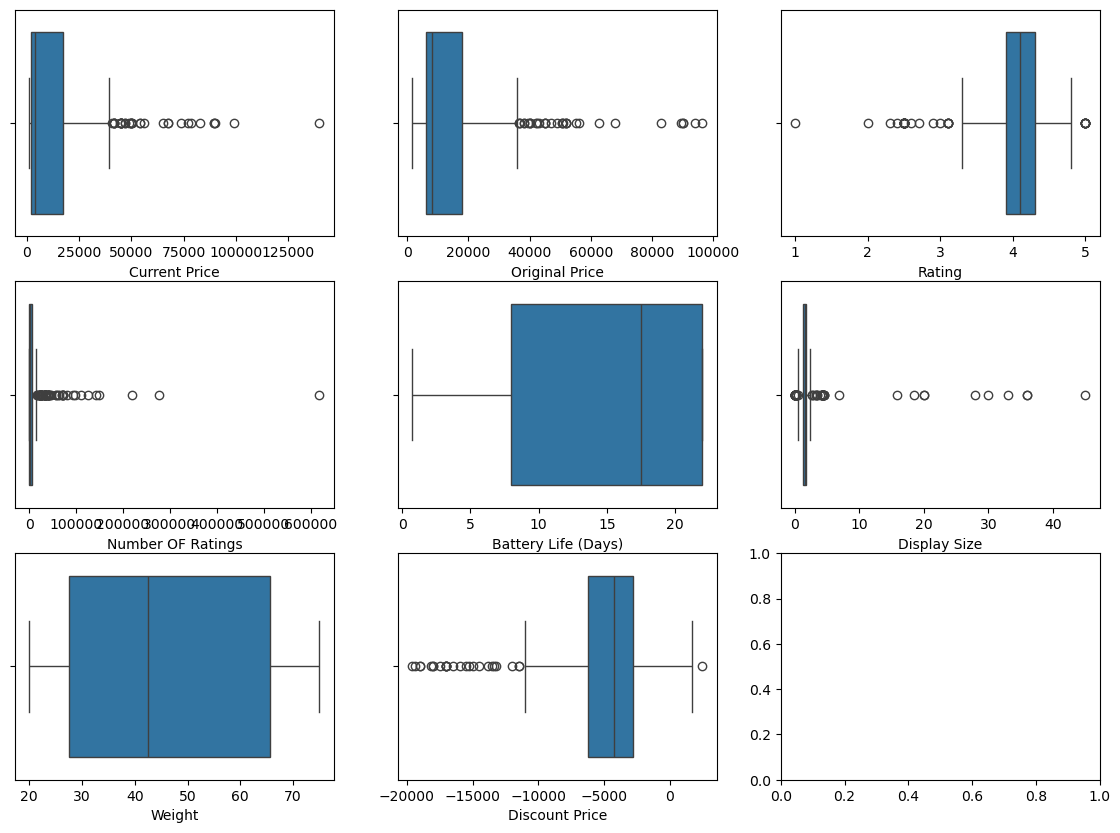

In [275]:
#plot the data tp see distribution again
#KDE 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data): # KDE plots offer a smoothed, continuous estimate of the data's probability density.
    row = i // 3
    col = i % 3
    ax = axes[row,col]
    sns.boxplot(x=train_df[column], ax=ax)

plt.show()



In [276]:
train_df[numerical_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Current Price        440 non-null    float64
 1   Original Price       377 non-null    float64
 2   Rating               444 non-null    float64
 3   Number OF Ratings    391 non-null    float64
 4   Battery Life (Days)  418 non-null    float64
 5   Display Size         419 non-null    float64
 6   Weight               264 non-null    float64
 7   Discount Price       377 non-null    float64
dtypes: float64(8)
memory usage: 28.3 KB


In [277]:
train_df.shape

(450, 15)

In [278]:
#we have a lot of skewed data. We need to normalize it and fix na's. Use median to replace na not mean

def remove_outliers(data, col):
    Q1= data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

import_col = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Display Size']

for col in import_col:
    train_df = remove_outliers(train_df, col)

In [279]:
for col in numerical_data:
    train_df[col].fillna(train_df[col].median(), inplace=True) #use median bc mean is affected by outliers

/var/folders/_r/nlxx6nzj7q76fnrcjnbc576w0000gn/T/ipykernel_30579/1607436175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)


In [280]:
train_df.shape

(181, 15)

In [292]:
train_df.isna().sum()

index                   0
Brand                   0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [293]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
data = scaler.fit_transform(train_df[numerical_data[:-1]]) #normalize the data except the last feature

 


In [294]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [295]:
data = pd.DataFrame(data, columns=numerical_data[:-1]) #convert the data to a dataframe

In [296]:
data

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.111631        0.568365  0.833333           0.622082   
1         0.034348        0.229960  0.416667           0.650096   
2         0.025761        0.681053  0.833333           0.396295   
3         0.017174        0.117609  0.666667           0.415958   
4         0.012881        0.080047  0.583333           0.978720   
..             ...             ...       ...                ...   
176       0.184621        0.211517  0.500000           0.000569   
177       0.068696        0.136391  0.500000           0.000569   
178       0.029969        0.001164  0.000000           0.000030   
179       0.120218        0.305424  0.333333           0.000000   
180       0.120218        0.305424  0.333333           0.000090   

     Battery Life (Days)  Display Size    Weight  
0               0.129412      0.615385  0.772727  
1               0.341176      0.538462  0.409091  
2               0.129412      0.615385  1.000000  
3               0.341176      0.538462  0.409091  
4               0.341176      0.538462  0.409091  
..                   ...           ...       ...  
176             1.000000      0.615385  0.409091  
177             1.000000      0.538462  0.409091  
178             1.000000      1.000000  0.409091  
179             1.000000      0.538462  0.409091  
180             1.000000      0.538462  0.409091  

[181 rows x 7 columns]

In [297]:
data.shape, train_df.shape

((181, 7), (181, 16))

In [298]:
train_df.drop(numerical_data[:-1], axis=1, inplace=True) #drop the numerical data from the original dataframe

In [299]:
train_df.head()

index       Brand                              Model Name Dial Shape  \
0      1  fire-boltt                                  BSW046        NaN   
1      2        boat                               Wave Call        NaN   
2      3  fire-boltt                                  BSW053        NaN   
3      4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4      5       noise                                  NSW-05        NaN   

  Strap Color Strap Material Touchscreen Bluetooth  Discount Price  
0         NaN        Silicon         Yes       Yes   -13200.000001  
1         NaN        Silicon         Yes       Yes    -5991.000000  
2         NaN        Silicon         Yes       Yes   -18200.000000  
3         NaN          Other         Yes       Yes    -3400.000000  
4         NaN          Other         Yes       Yes    -2500.000000

In [302]:
data.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.129412      0.615385  0.772727  
1             0.341176      0.538462  0.409091  
2             0.129412      0.615385  1.000000  
3             0.341176      0.538462  0.409091  
4             0.341176      0.538462  0.409091

In [363]:
train_df = pd.concat([train_df.reset_index(), data], axis=1) #concatenate the normalized data to the original dataframe
train_df.shape
#reset index because we dropped some rows 

(181, 16)

In [364]:
train_df.head()

index       Brand                              Model Name Dial Shape  \
0      1  fire-boltt                                  BSW046        NaN   
1      2        boat                               Wave Call        NaN   
2      3  fire-boltt                                  BSW053        NaN   
3      4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4      5       noise                                  NSW-05        NaN   

  Strap Color Strap Material Touchscreen Bluetooth  Discount Price  \
0         NaN        Silicon         Yes       Yes   -13200.000001   
1         NaN        Silicon         Yes       Yes    -5991.000000   
2         NaN        Silicon         Yes       Yes   -18200.000000   
3         NaN          Other         Yes       Yes    -3400.000000   
4         NaN          Other         Yes       Yes    -2500.000000   

   Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.129412      0.615385  0.772727  
1             0.341176      0.538462  0.409091  
2             0.129412      0.615385  1.000000  
3             0.341176      0.538462  0.409091  
4             0.341176      0.538462  0.409091

In [366]:
train_df.isna().sum()

index                   0
Brand                   0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [367]:
train_df[numerical_data]

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.111631        0.568365  0.833333           0.622082   
1         0.034348        0.229960  0.416667           0.650096   
2         0.025761        0.681053  0.833333           0.396295   
3         0.017174        0.117609  0.666667           0.415958   
4         0.012881        0.080047  0.583333           0.978720   
..             ...             ...       ...                ...   
176       0.184621        0.211517  0.500000           0.000569   
177       0.068696        0.136391  0.500000           0.000569   
178       0.029969        0.001164  0.000000           0.000030   
179       0.120218        0.305424  0.333333           0.000000   
180       0.120218        0.305424  0.333333           0.000090   

     Battery Life (Days)  Display Size    Weight  Discount Price  
0               0.129412      0.615385  0.772727   -13200.000001  
1               0.341176      0.538462  0.409091    -5991.000000  
2               0.129412      0.615385  1.000000   -18200.000000  
3               0.341176      0.538462  0.409091    -3400.000000  
4               0.341176      0.538462  0.409091    -2500.000000  
..                   ...           ...       ...             ...  
176             1.000000      0.615385  0.409091    -2000.000000  
177             1.000000      0.538462  0.409091    -2700.000000  
178             1.000000      1.000000  0.409091       -2.000000  
179             1.000000      0.538462  0.409091    -6000.000000  
180             1.000000      0.538462  0.409091    -6000.000000  

[181 rows x 8 columns]

# Feature Engineering - Categorical Features

In [368]:
train_df.shape

(181, 16)

In [369]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [370]:
train_df[categorical_col].head()

Brand                              Model Name Dial Shape Strap Color  \
0  fire-boltt                                  BSW046        NaN         NaN   
1        boat                               Wave Call        NaN         NaN   
2  fire-boltt                                  BSW053        NaN         NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
4       noise                                  NSW-05        NaN         NaN   

  Strap Material Touchscreen Bluetooth  
0        Silicon         Yes       Yes  
1        Silicon         Yes       Yes  
2        Silicon         Yes       Yes  
3          Other         Yes       Yes  
4          Other         Yes       Yes

In [371]:
#we use a one-way anova test to check the correlation between the categorical data and the numerical data
#ex prediction: brand name has no correlation with discount price --> anova test gives you p-value to either accept that prediction or not

from scipy.stats import f_oneway


In [372]:
categorical_col.remove("Bluetooth")

In [373]:
for col in categorical_col:
    Category_group = train_df.groupby(col)['Discount Price'].apply(list) #this will group the data by column and each group is a list
    Anova_results = f_oneway(*Category_group)
    print(f'{col} : {Anova_results[1]}')

#since the p-value is less than 0.05, we can reject the null hypothesis that the two columns are independent and thus they are dependent
#this means that the columns with p-value under 0.05 has a correlation with the discount price

Brand : 8.421850586222326e-14
Model Name : 4.263744302000662e-05
Dial Shape : 0.0001236872758889996
Strap Color : 0.06574836943894026
Strap Material : 0.00039800860157354574
Touchscreen : 0.9803878528536762


In [374]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material']

train_df[imp_col].head()

Brand                              Model Name Dial Shape  \
0  fire-boltt                                  BSW046        NaN   
1        boat                               Wave Call        NaN   
2  fire-boltt                                  BSW053        NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4       noise                                  NSW-05        NaN   

  Strap Material  
0        Silicon  
1        Silicon  
2        Silicon  
3          Other  
4          Other

In [375]:
for col in imp_col:
    train_df[col].fillna('other', inplace=True)

/var/folders/_r/nlxx6nzj7q76fnrcjnbc576w0000gn/T/ipykernel_30579/2024377746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna('other', inplace=True)


In [376]:
train_df[imp_col].isna().sum()  

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [377]:
#Now we convert the categorical data int numerical data using a descriptive way called the dummy encoding

brand = pd.get_dummies(train_df['Brand'], drop_first=True).astype(int)


In [378]:
#do the rest

model_name = pd.get_dummies(train_df['Model Name']).drop(['other'], axis=1).astype(int)
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'], axis=1).astype(int)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'], axis=1).astype(int) 

In [379]:
imp_df = pd.concat([brand, model_name,dial_shape, strap_material], axis=1)

In [380]:
imp_df.head() #coverted all categorical values to numerical values

ambrane  boat  crossbeats  dizo  fire-boltt  fitbit  fossil  garmin  \
0        0     0           0     0           1       0       0       0   
1        0     1           0     0           0       0       0       0   
2        0     0           0     0           1       0       0       0   
3        0     0           0     0           0       0       0       0   
4        0     0           0     0           0       0       0       0   

   gizmore  hammer  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  \
0        0       0  ...        0      0      0      0        0       0   
1        0       0  ...        0      0      0      0        0       0   
2        0       0  ...        0      0      0      0        0       0   
3        0       0  ...        0      0      0      1        0       0   
4        0       0  ...        0      0      0      1        0       0   

   Silicon  Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0        1                0          0                            0  
1        1                0          0                            0  
2        1                0          0                            0  
3        0                0          0                            0  
4        0                0          0                            0  

[5 rows x 193 columns]

In [381]:
new_df = pd.concat([train_df[numerical_data], imp_df], axis=1) #concatenate the new dataframe to the original dataframe

In [382]:
new_df.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.111631        0.568365  0.833333           0.622082   
1       0.034348        0.229960  0.416667           0.650096   
2       0.025761        0.681053  0.833333           0.396295   
3       0.017174        0.117609  0.666667           0.415958   
4       0.012881        0.080047  0.583333           0.978720   

   Battery Life (Days)  Display Size    Weight  Discount Price  ambrane  boat  \
0             0.129412      0.615385  0.772727   -13200.000001        0     0   
1             0.341176      0.538462  0.409091    -5991.000000        0     1   
2             0.129412      0.615385  1.000000   -18200.000000        0     0   
3             0.341176      0.538462  0.409091    -3400.000000        0     0   
4             0.341176      0.538462  0.409091    -2500.000000        0     0   

   ...  Leather  Metal  Nylon  Other  Plastic  Rubber  Silicon  \
0  ...        0      0      0      0        0       0        1   
1  ...        0      0      0      0        0       0        1   
2  ...        0      0      0      0        0       0        1   
3  ...        0      0      0      1        0       0        0   
4  ...        0      0      0      1        0       0        0   

   Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0                0          0                            0  
1                0          0                            0  
2                0          0                            0  
3                0          0                            0  
4                0          0                            0  

[5 rows x 201 columns]

In [383]:
new_df.isna().sum() 

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 201, dtype: int64

In [386]:
new_df.to_csv('../data/clean.csv', index=False) #index false so we dont save the index